In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy.typing as npt
import matplotlib.pyplot as plt

#TODO
- fazer plot da legenda ficar sempre no canto superior esquerdo
- por titulo na legenda dizendo qual variṕavel esta avriando
- pegar chave e valor de valores fixos de forma mais elegante

In [8]:
def plot_empirical_error_convergence(loss: npt.NDArray[np.float_], nn_config: dict, not_fixed_param: str, annotate: bool = False) -> None:
    sns.set(style="darkgrid", color_codes=True, rc={"figure.figsize": (8, 5)})
    ax = sns.lineplot(data=loss, markers=True, marker="o", label=f"{nn_config[not_fixed_param]}")

    del nn_config[not_fixed_param]
    keys = list(nn_config.keys())
    vls = list(nn_config.values())

    plt.xticks(np.arange(len(loss)))
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(title=not_fixed_param, fontsize=10)
    plt.title(f"Convergence of empirical error\n{keys[0]} = {vls[0]} , {keys[1]} = {vls[1]}")
    if annotate:
        for i, j in enumerate(loss):
            ax.annotate(str(np.round(j, 2)), xy=(i, j), xytext=(i, j + 0.02))

In [9]:
def plot_fixed(results: pd.DataFrame, hidden_layer_size: np.int_ = None, batch_size: np.int_ = None, learning_rate: np.float_ = None, annotate: bool = False) -> None:
    if hidden_layer_size is None and batch_size is None and learning_rate is None:
        raise "Especifique quais métricas devem ser fixadas"
    not_fixed: str = ""
    
    if hidden_layer_size and batch_size:
        aux: pd.DataFrame = results.query(f"hidden_layer_size == {hidden_layer_size} and batch_size == {batch_size}")[["learning_rate", "history"]]
        not_fixed = "learning_rate"
        for i in range(aux.shape[0]):
            e = aux.iloc[i]
            plot_empirical_error_convergence(loss=e.history["loss"], nn_config={"hidden_layer_size": hidden_layer_size, "batch_size": batch_size, "learning_rate": e.learning_rate}, not_fixed_param=not_fixed, annotate=annotate)
    
    if hidden_layer_size and learning_rate:
        aux: pd.DataFrame = results.query(f"hidden_layer_size == {hidden_layer_size} and learning_rate == {learning_rate}")[["batch_size", "history"]]
        not_fixed = "batch_size"
        for i in range(aux.shape[0]):
            e = aux.iloc[i]
            plot_empirical_error_convergence(loss=e.history["loss"], nn_config={"hidden_layer_size": hidden_layer_size, "batch_size": e.batch_size, "learning_rate": learning_rate}, not_fixed_param=not_fixed, annotate=annotate)
    
    if learning_rate and batch_size:
        aux: pd.DataFrame = results.query(f"batch_size == {batch_size} and learning_rate == {learning_rate}")[["hidden_layer_size", "history"]]
        not_fixed = "hidden_layer_size"
        for i in range(aux.shape[0]):
            e = aux.iloc[i]
            plot_empirical_error_convergence(loss=e.history["loss"], nn_config={"hidden_layer_size": e.hidden_layer_size, "batch_size": batch_size, "learning_rate": learning_rate}, not_fixed_param=not_fixed, annotate=annotate)

In [10]:
results: pd.DataFrame = pd.read_json("data/results.json")
results.nlargest(columns=["accuracy_score"], n=10)

,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,random_state_seed,test_size,hidden_layer_size,batch_size,learning_rate,history
27,0.932667,"[0.9312977099236641, 0.9464285714285711, 0.947...","[0.976, 0.9754601226993861, 0.9202898550724631...","[0.953125, 0.9607250755287011, 0.9338235294117...","[[122, 0, 0, 0, 0, 0, 1, 0, 2, 0], [0, 159, 0,...",42,0.3,100,10,0.5,"{'loss': [0.792690753936767, 0.359396457672119..."
28,0.928667,"[0.9248120300751881, 0.9634146341463411, 0.947...","[0.984, 0.9693251533742331, 0.9130434782608691...","[0.9534883720930231, 0.966360856269113, 0.9298...","[[123, 0, 0, 0, 0, 0, 0, 0, 2, 0], [0, 158, 0,...",42,0.3,100,10,1.0,"{'loss': [0.8080727458000181, 0.31917330622673..."
16,0.924667,"[0.9302325581395341, 0.9815950920245391, 0.919...","[0.96, 0.9815950920245391, 0.9130434782608691,...","[0.9448818897637791, 0.98159509202454, 0.91636...","[[120, 0, 1, 0, 0, 1, 2, 0, 1, 0], [0, 160, 0,...",42,0.3,50,10,1.0,"{'loss': [0.74952495098114, 0.320635229349136,..."
31,0.921333,"[0.9179104477611941, 0.9578313253012041, 0.898...","[0.984, 0.9754601226993861, 0.898550724637681,...","[0.949806949806949, 0.966565349544073, 0.89855...","[[123, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 159, 0,...",42,0.3,100,50,1.0,"{'loss': [1.1446722745895381, 0.47448799014091..."
15,0.920667,"[0.9166666666666661, 0.9580838323353291, 0.916...","[0.968, 0.9815950920245391, 0.8768115942028981...","[0.9416342412451361, 0.9696969696969691, 0.896...","[[121, 0, 0, 0, 1, 1, 1, 0, 1, 0], [0, 160, 0,...",42,0.3,50,10,0.5,"{'loss': [0.769608795642852, 0.361143141984939..."
4,0.912000,"[0.9097744360902251, 0.940828402366863, 0.9197...","[0.968, 0.9754601226993861, 0.9130434782608691...","[0.9379844961240311, 0.9578313253012041, 0.916...","[[121, 0, 0, 0, 1, 0, 1, 0, 2, 0], [0, 159, 1,...",42,0.3,25,10,1.0,"{'loss': [0.770088672637939, 0.371707260608673..."
30,0.910667,"[0.9307692307692301, 0.94047619047619, 0.85135...","[0.968, 0.9693251533742331, 0.9130434782608691...","[0.9490196078431371, 0.9546827794561931, 0.881...","[[121, 0, 2, 0, 0, 1, 0, 0, 1, 0], [0, 158, 0,...",42,0.3,100,50,0.5,"{'loss': [1.308714509010315, 0.582722127437591..."
3,0.908667,"[0.896296296296296, 0.951807228915662, 0.88405...","[0.968, 0.9693251533742331, 0.884057971014492,...","[0.9307692307692301, 0.9604863221884491, 0.884...","[[121, 0, 1, 0, 1, 1, 0, 0, 1, 0], [0, 158, 0,...",42,0.3,25,10,0.5,"{'loss': [0.8144560456275941, 0.37459903955459..."
18,0.906000,"[0.9248120300751881, 0.9411764705882351, 0.939...","[0.984, 0.9815950920245391, 0.905797101449275,...","[0.9534883720930231, 0.9609609609609611, 0.922...","[[123, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 160, 0,...",42,0.3,50,50,0.5,"{'loss': [1.306030750274658, 0.61178183555603,..."
6,0.898000,"[0.9029850746268651, 0.935294117647058, 0.8881...","[0.968, 0.9754601226993861, 0.9202898550724631...","[0.934362934362934, 0.9549549549549551, 0.9039...","[[121, 0, 1, 0, 0, 1, 2, 0, 0, 0], [0, 159, 0,...",42,0.3,25,50,0.5,"{'loss': [1.445228695869445, 0.698486328125, 0..."


In [11]:
results.nsmallest(columns=["accuracy_score"], n=10)

,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,random_state_seed,test_size,hidden_layer_size,batch_size,learning_rate,history
14,0.095333,"[0.0, 0.0, 0.0, 0.095333333333333, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.17407181984175202, 0.0, 0.0,...","[[0, 0, 0, 125, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1...",42,0.3,50,1,10.0,"{'loss': [82.73007202148438, 97.1878662109375,..."
26,0.100000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.181...","[[0, 0, 0, 0, 0, 0, 0, 0, 125, 0], [0, 0, 0, 0...",42,0.3,100,1,10.0,"{'loss': [58.385589599609375, 72.3110885620117..."
2,0.154667,"[0.149877149877149, 0.0, 0.16034985422740503, ...","[0.976, 0.0, 0.7971014492753621, 0.0, 0.0, 0.0...","[0.259850905218317, 0.0, 0.266990291262135, 0....","[[122, 0, 3, 0, 0, 0, 0, 0, 0, 0], [2, 0, 161,...",42,0.3,25,1,10.0,"{'loss': [18.210779190063477, 30.4737052917480..."
23,0.222000,"[0.983606557377049, 0.0, 0.0, 0.33680555555555...","[0.48, 0.0, 0.0, 0.678321678321678, 0.99408284...","[0.6451612903225801, 0.0, 0.0, 0.4501160092807...","[[60, 0, 0, 20, 5, 40, 0, 0, 0, 0], [0, 0, 0, ...",42,0.3,50,3500,10.0,"{'loss': [2.342935800552368, 4.03581428527832,..."
11,0.262000,"[0.27212389380530905, 0.0, 0.15711645101663502...","[0.984, 0.0, 0.6159420289855071, 0.0, 0.355029...","[0.42634315424610003, 0.0, 0.250368188512518, ...","[[123, 0, 2, 0, 0, 0, 0, 0, 0, 0], [0, 0, 163,...",42,0.3,25,3500,10.0,"{'loss': [2.459617853164673, 3.765813589096069..."
35,0.324667,"[0.15346534653465302, 0.948051948051948, 0.0, ...","[0.992, 0.895705521472392, 0.0, 0.713286713286...","[0.26580921757770604, 0.9211356466876971, 0.0,...","[[124, 0, 0, 1, 0, 0, 0, 0, 0, 0], [2, 146, 0,...",42,0.3,100,3500,10.0,"{'loss': [2.539047479629516, 15.26717376708984..."
25,0.446000,"[0.839694656488549, 1.0, 1.0, 0.66433566433566...","[0.88, 0.036809815950920005, 0.065217391304347...","[0.859375, 0.07100591715976301, 0.122448979591...","[[110, 0, 0, 1, 0, 10, 0, 1, 3, 0], [0, 6, 0, ...",42,0.3,100,1,1.0,"{'loss': [2.497031927108764, 3.36293077468872,..."
34,0.480667,"[0.580952380952381, 0.39460784313725406, 0.318...","[0.976, 0.9877300613496931, 0.833333333333333,...","[0.7283582089552231, 0.5639229422066551, 0.460...","[[122, 1, 1, 0, 0, 0, 0, 0, 1, 0], [0, 161, 2,...",42,0.3,100,3500,1.0,"{'loss': [2.529436826705932, 2.57583475112915,..."
9,0.493333,"[0.6327683615819211, 0.42702702702702705, 0.49...","[0.896, 0.9693251533742331, 0.760869565217391,...","[0.7417218543046351, 0.592870544090056, 0.6017...","[[112, 0, 5, 2, 0, 0, 6, 0, 0, 0], [0, 158, 2,...",42,0.3,25,3500,0.5,"{'loss': [2.416857481002807, 2.273723840713501..."
5,0.508000,"[0.8828125, 0.9620253164556961, 0.840579710144...","[0.904, 0.466257668711656, 0.420289855072463, ...","[0.893280632411067, 0.628099173553719, 0.56038...","[[113, 0, 0, 3, 0, 0, 1, 6, 0, 2], [0, 76, 1, ...",42,0.3,25,10,10.0,"{'loss': [3.423083066940307, 2.434467077255249..."


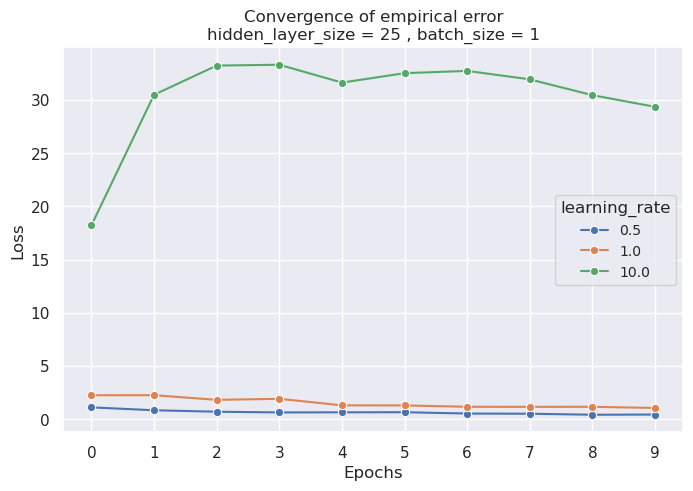

In [12]:
ex = results.iloc[0]
plot_fixed(results=results, hidden_layer_size=ex["hidden_layer_size"], batch_size=ex["batch_size"], learning_rate=None)